In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mimp
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D,MaxPool2D,Activation,Flatten,Dropout,Dense
from keras.models import Sequential
from random import shuffle
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

from keras import backend as K

Using TensorFlow backend.


In [2]:
train_df=pd.read_csv("../input/digit-recognizer/train.csv")

In [3]:
test_df=pd.read_csv("../input/digit-recognizer/test.csv")

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(f'Length of train_df {len(train_df)}')
print(f'Length of test_df {len(test_df)}')


Length of train_df 42000
Length of test_df 28000


In [7]:
x_train = train_df.iloc[:,1:]
y_train = train_df.iloc[:,0]

In [8]:
print(x_train.shape)

(42000, 784)


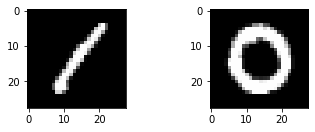

In [9]:
plt.subplot(221)
plt.imshow(np.reshape(np.array(x_train.iloc[0]),(28,28)), cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(np.reshape(np.array(x_train.iloc[1]),(28,28)), cmap=plt.get_cmap('gray'))

In [10]:
x_train=x_train/255.0
x_test=test_df/255.0

In [11]:
x_train = x_train.values.reshape(-1,28,28,1)
X_test = x_test.values.reshape(-1,28,28,1)

In [12]:
print(x_train.shape)

(42000, 28, 28, 1)


In [13]:

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.15, random_state=5)

In [14]:
print(y_test.shape)
print(y_train.shape)

(6300,)
(35700,)


In [15]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [16]:
y_test.shape

(6300, 10)

In [21]:
#MODEL Creation
model3=Sequential()
model3.add(Conv2D(32,(3,3),padding = 'Same', 
                     activation ='relu', input_shape = (28,28,1)))

model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(64, (3,3),padding = 'Same', 
                     activation ='relu'))

model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Conv2D(64, (3,3),padding = 'Same', 
                     activation ='relu'))

model3.add(Flatten())
model3.add(Dense(128, activation = "relu"))

model3.add(Dense(64, activation = "relu"))

model3.add(Dense(10, activation = "softmax"))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [25]:
model3.compile(optimizer = 'rmsprop' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [26]:
model3.fit(x_train, y_train,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 35700 samples, validate on 6300 samples
Epoch 1/12
35700/35700 [==============================] - 31s 864us/step - loss: 0.2006 - accuracy: 0.9363 - val_loss: 0.0687 - val_accuracy: 0.9789
Epoch 2/12
35700/35700 [==============================] - 31s 874us/step - loss: 0.0515 - accuracy: 0.9838 - val_loss: 0.0471 - val_accuracy: 0.9846
Epoch 3/12
35700/35700 [==============================] - 30s 850us/step - loss: 0.0347 - accuracy: 0.9897 - val_loss: 0.0503 - val_accuracy: 0.9859
Epoch 4/12
35700/35700 [==============================] - 31s 866us/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0432 - val_accuracy: 0.9863
Epoch 5/12
35700/35700 [==============================] - 31s 860us/step - loss: 0.0193 - accuracy: 0.9943 - val_loss: 0.0497 - val_accuracy: 0.9863
Epoch 6/12
35700/35700 [==============================] - 31s 869us/step - loss: 0.0157 - accuracy: 0.9954 - val_loss: 0.0458 - val_accuracy: 0.9895
Epoch 7/12
35700/35700 [==============================] -

In [28]:
results = model3.predict(X_test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("cnn_mnist_datagen.csv",index=False)